In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import StockHistory
import seaborn as sns

In [28]:
names = StockHistory.get_namad_list()

In [68]:
sec_data = pd.DataFrame()
asset =0
for n in names["NAMAD"]:
    d = StockHistory.get_namad_history_by_name(n,start_date='1390-1-1',from_cache=True)["ClosePrice"]
    if len(d) > 1700:
        asset+=1
        sec_data[n] = d

16

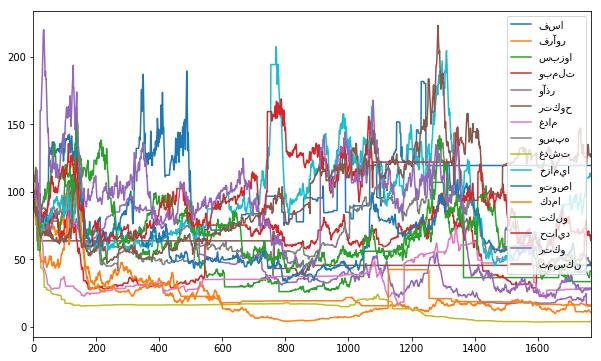

In [60]:
# (sec_data / sec_data.iloc[0] * 100).plot (figsize = (10,6))
# asset

In [70]:
log_returns = np.log(sec_data / sec_data.shift(1))

In [ ]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    wights = np.random.random(asset)
    wights /= np.sum(wights)
    ret = np.sum(wights * log_returns.mean()) * 30
    pfolio_returns.append(ret)
    vol = np.sqrt(np.dot(wights.T,np.dot(log_returns.cov() * 30,wights)))
    pfolio_volatilities.append(vol)
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolios = pd.DataFrame({'returns' : pfolio_returns,'volatility' : pfolio_volatilities})
pfolios.plot(x='volatility',y='returns',kind = 'scatter',figsize=(10,6))
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')